In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=load_iris()
X=data.data
y=data.target

In [22]:
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [23]:
def inv_dist(distances, w_factor):
    return 1 / (distances + w_factor)

In [37]:
weight_factor=0.5

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [30]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [31]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [32]:
y_pred = KNN.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score for k={5}: {acc:.3f}")

Accuracy score for k=5: 1.000


In [39]:
ks = [3, 7, 9]
for k in ks:
    KNN = KNeighborsClassifier(n_neighbors=k, weights='distance')
    KNN.fit(X_train, y_train)
    y_pred = KNN.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy score for k={k}: {acc:.3f}")

Accuracy score for k=3: 1.000
Accuracy score for k=7: 1.000
Accuracy score for k=9: 1.000


In [41]:
new_data = [[5.0, 3.0, 1.5, 0.5], [6.0, 3.0, 4.5, 1.5], [7.0, 3.0, 6.0, 2.5]]
clf = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
clf.fit(X_train, y_train)
new_pred = clf.predict(new_data)
print(new_pred)

[0 1 2]


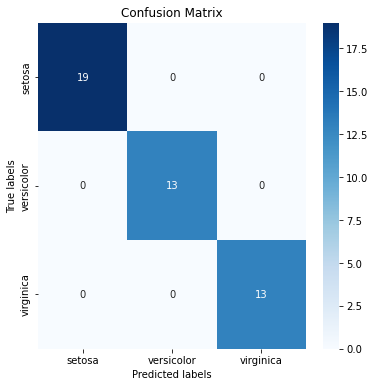

In [43]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(data.target_names)
ax.yaxis.set_ticklabels(data.target_names)
plt.show()